In [349]:
import time
import datetime
import csv

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import date2num, num2date
from matplotlib import ticker

import seaborn as sns
%matplotlib inline

In [350]:
SfBartAlert = pd.read_csv("./Data/SFBARTalert_tweets.csv")
AllTweets = pd.read_csv("./Data/SFBARTalertFull.csv")

In [351]:
SfBartAlert['date'] = pd.to_datetime(SfBartAlert['created_at'],dayfirst=True)
AllTweets['date'] = pd.to_datetime(AllTweets['timestamp'],dayfirst=True)

In [360]:
#Insert cause
SfBartAlert['Equip'] = SfBartAlert.text.str.contains("equip")
SfBartAlert['Maintenance'] = SfBartAlert.text.str.contains("maint")
SfBartAlert['Track'] = SfBartAlert.text.str.contains("track")
SfBartAlert['Police'] = SfBartAlert.text.str.contains("police")
SfBartAlert['Medical'] = SfBartAlert.text.str.contains("medical")
SfBartAlert['MajorMedical'] = SfBartAlert.text.str.contains("major medical")
SfBartAlert['Mechanical'] = SfBartAlert.text.str.contains("mechanical")
SfBartAlert['Technical'] = SfBartAlert.text.str.contains("technical")
SfBartAlert['Investigation'] = SfBartAlert.text.str.contains("investi")
SfBartAlert['Disabled'] = SfBartAlert.text.str.contains("disabled")
SfBartAlert['Earthquake'] = SfBartAlert.text.str.contains("quake")
SfBartAlert['Weather'] = SfBartAlert.text.str.contains("weather")
SfBartAlert['Debris'] = SfBartAlert.text.str.contains("debris")
SfBartAlert['Obstruct'] = SfBartAlert.text.str.contains("obstruct")
SfBartAlert['Power'] = SfBartAlert.text.str.contains("power")
SfBartAlert['Animal'] = SfBartAlert.text.str.contains("animal")
SfBartAlert['Person'] = SfBartAlert.text.str.contains("person")
SfBartAlert['Fire'] = SfBartAlert.text.str.contains("fire")
SfBartAlert['SystemWide'] = (SfBartAlert.text.str.contains("system") & SfBartAlert.text.str.contains("wide"))




In [363]:
debug = SfBartAlert[(SfBartAlert.text.str.contains("delay")) &
            (SfBartAlert['Equip'] ==False) &
            (SfBartAlert['Maintenance'] ==False) & 
            (SfBartAlert['Track'] ==False) & 
            (SfBartAlert['Police'] ==False) &
            (SfBartAlert['Medical'] ==False) &
            (SfBartAlert['MajorMedical'] ==False) &
            (SfBartAlert['Mechanical'] ==False) & 
            (SfBartAlert['Technical'] ==False) & 
            (SfBartAlert['Investigation'] ==False) & 
            (SfBartAlert['Disabled'] ==False) & 
            (SfBartAlert['Earthquake'] ==False) &
            (SfBartAlert['Weather'] ==False) &
            (SfBartAlert['Debris'] ==False) &
            (SfBartAlert['Obstruct'] ==False) &
            (SfBartAlert['Power'] ==False) &
            (SfBartAlert['Animal'] ==False) &
            (SfBartAlert['Person']==False) &
            (SfBartAlert['Fire'] ==False) &
            (SfBartAlert['SystemWide'] == False)]

In [364]:
pd.set_option('display.max_colwidth', -1)
print(debug.text) 

47      b'10 min delay on FRMT line in DUBL, warm springs and FRMT dirs.'                                                                  
121     b'BART svc has resumed between BALB and COLM in SFO, MLBR and East Bay dirs. Expect major delays in svc in all dirs from DALY stn.'
183     b'10 min delay on FRMT line in RICH and DALY dirs.'                                                                                
251     b'20 min delay between DELN and RICH in both dirs.'                                                                                
345     b'BART recovering: 10 min delay on SF line in East Bay dir.'                                                                       
353     b'BART recovering: 10 min delay on SF line in SFO, MLBR, DALY and East Bay dirs.'                                                  
418     b'10 min delay on DALY line in SFO, MLBR, DALY and East Bay dirs.'                                                                 
481     b'BART recov

In [365]:
debug[50:]

,id,username,created_at,text,date,Equip,Maintenance,Track,Police,Medical,...,Disabled,Earthquake,Weather,Debris,Obstruct,Power,Animal,Person,Fire,SystemWide
2151,6.914830e+17,SFBARTalert,25/1/16 4:48,b'BART svc has been restored at Oak airport connector. expect some delays in svc.',2016-01-25 04:48:00,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2355,6.707430e+17,SFBARTalert,28/11/15 23:15,"b'BART recovering: 10 min delay in PITT, FRMT and RICH dirs.'",2015-11-28 23:15:00,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2363,6.689710e+17,SFBARTalert,24/11/15 1:54,"b'10 min delay between SF stns and East Bay stns in PITT, DUBL, FRMT and RICH dirs.'",2015-11-24 01:54:00,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2427,6.640990e+17,SFBARTalert,10/11/15 15:16,"b'BART recovering: 10 min delay at SF and peninsula stns in SFO, MLBR, DALY and East Bay dirs. CIVC stn is now back open.'",2015-11-10 15:16:00,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2428,6.640960e+17,SFBARTalert,10/11/15 15:05,"b'BART recovering: 15 min delay at SF and peninsula stns in SFO, MLBR, DALY and East Bay dirs. CIVC stn is now back open.'",2015-11-10 15:05:00,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2468,6.610730e+17,SFBARTalert,2/11/15 6:49,b'BART recovering: 10 min delay on SFO line in SFO and DALY dirs.',2015-11-02 06:49:00,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2528,6.563460e+17,SFBARTalert,20/10/15 5:48,b'10 min delay between HAYW and FRMT in FRMT and RICH dirs.',2015-10-20 05:48:00,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2533,6.561350e+17,SFBARTalert,19/10/15 15:47,b'BART recovering: 10 min delay at SF stns in SFO and MLBR dirs.',2015-10-19 15:47:00,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2618,6.486470e+17,SFBARTalert,28/9/15 23:53,"b'BART recovering: 10 min delay between SF stns and East Bay stns in PITT, DUBL, FRMT and MLBR dirs.'",2015-09-28 23:53:00,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2619,6.486460e+17,SFBARTalert,28/9/15 23:51,"b'10 min delay between SF stns and East Bay stns in PITT, DUBL, FRMT and MLBR dirs.'",2015-09-28 23:51:00,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [302]:
#Last time
cutoff_time = SfBartAlert["date"][len(SfBartAlert)-1]
print(cutoff_time)
type(cutoff_time)

2015-06-05 16:07:00


pandas.tslib.Timestamp

In [303]:
SfBartAlert.tail()

,id,username,created_at,text,date
3220,6.070020e+17,SFBARTalert,6/6/15 1:52,"b'15 to 25 min delay in downtown SF in SFO, ML...",2015-06-06 01:52:00
3221,6.069890e+17,SFBARTalert,6/6/15 1:00,"b'15 to 20 min delay in downtown SF in SFO, ML...",2015-06-06 01:00:00
3222,6.069810e+17,SFBARTalert,6/6/15 0:30,"b'10 to 15 min delay in downtown SF in SFO, ML...",2015-06-06 00:30:00
3223,6.069590e+17,SFBARTalert,5/6/15 23:02,"b'5 to 10 min delay in downtown SF in SFO, MLB...",2015-06-05 23:02:00
3224,6.068550e+17,SFBARTalert,5/6/15 16:07,"b'10-20 min delay in downtown SF in SFO, MLBR ...",2015-06-05 16:07:00


In [304]:
UserTweets = AllTweets[(AllTweets.username != "b'SFBARTalert '") & (AllTweets.date > cutoff_time)]

In [305]:
UserTweets.tail(5)

,index,username,tweet,timestamp,date
4840,4840,b'Kyle Anne ',"b""Police activity at Civic Center looks like. ...",5/6/15 18:43,2015-06-05 18:43:00
4841,4841,b'Marketduck ',"b""@SFBARTalert it's better if you just alert u...",5/6/15 18:37,2015-06-05 18:37:00
4842,4842,b'citigurl006 ',b'Its always something! @SFBARTalert @SFBART',5/6/15 18:06,2015-06-05 18:06:00
4843,4843,b'JD ',b'@SFBARTalert they said medical emergency at ...,5/6/15 17:19,2015-06-05 17:19:00
4844,4844,b' \xf0\x9f\x8f\x96\xef\xb8\x8f\nCat and Nick ...,"b""@SFBARTalert you're garbage""",5/6/15 17:12,2015-06-05 17:12:00


In [306]:
len(UserTweets)-2

4250

In [307]:
Day = pd.Timestamp('2015-06-05 00:00:00')

UserFreq = []
BartFreq = []

for x in range(732):
    NextDay = Day + pd.DateOffset(1)
    #UserFreq.append(np.array([Day,len(UserTweets[(UserTweets.date>Day) & (UserTweets.date<NextDay)])]))
    UserFreq.append([Day,len(UserTweets[(UserTweets.date>Day) & (UserTweets.date<NextDay)])])
    BartFreq.append([Day,len(SfBartAlert[(SfBartAlert.date>Day) & (SfBartAlert.date<NextDay)])])
    Day = NextDay

In [308]:
df = pd.DataFrame(UserFreq)
df2 = pd.DataFrame(BartFreq)

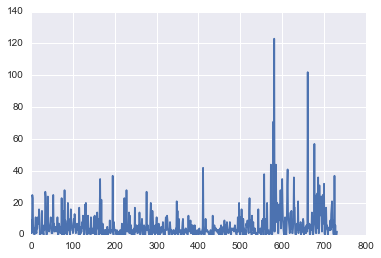

In [309]:
plt.plot(df[1])

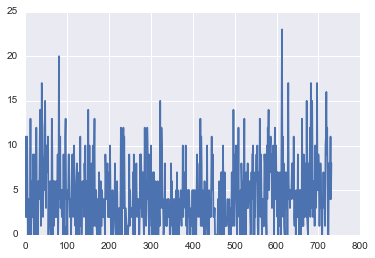

In [310]:
plt.plot(df2[1])

In [315]:
SfBartAlertRecovery = SfBartAlert[SfBartAlert.text.str.contains("recover")]
SfBartAlertDelay = SfBartAlert[np.invert(SfBartAlert.text.str.contains("recover")) & (SfBartAlert.text.str.contains("delay"))]

In [321]:
SfBartAlertRecovery.head(5)

,id,username,created_at,text,date
0,8.724150e+17,SFBARTalert,7/6/17 11:28,b'BART recovering: 10 min delay at DALY in PIT...,2017-06-07 11:28:00
3,8.721040e+17,SFBARTalert,6/6/17 14:53,b'BART recovering: 10 min delay at 12TH in SFO...,2017-06-06 14:53:00
5,8.718830e+17,SFBARTalert,6/6/17 0:13,"b'BART recovering: 10 min delay in PITT, DUBL,...",2017-06-06 00:13:00
6,8.718760e+17,SFBARTalert,5/6/17 23:47,b'BART recovering: 20 min delay on SF line in ...,2017-06-05 23:47:00
8,8.718720e+17,SFBARTalert,5/6/17 23:32,b'BART recovering: 10 min delay on SF line in ...,2017-06-05 23:32:00


In [322]:
SfBartAlertDelay.head(5)

,id,username,created_at,text,date
1,8.724120e+17,SFBARTalert,7/6/17 11:18,b'10 min delay at DALY in PITT and DUBL dirs d...,2017-06-07 11:18:00
2,8.721180e+17,SFBARTalert,6/6/17 15:50,b'10 min delay at PHIL in SFO and DALY dirs du...,2017-06-06 15:50:00
4,8.721020e+17,SFBARTalert,6/6/17 14:44,"b'10 min delay at 12TH in SFO, MLBR and DALY d...",2017-06-06 14:44:00
7,8.718750e+17,SFBARTalert,5/6/17 23:43,b'20 min delay on SF line in East Bay dir due ...,2017-06-05 23:43:00
9,8.718640e+17,SFBARTalert,5/6/17 22:58,"b'10 min delay on SF line in SFO, MLBR, DALY a...",2017-06-05 22:58:00


In [320]:
len(SfBartAlertDelay)

1576

In [84]:
Day + pd.DateOffset(1)

Timestamp('2015-05-27 00:00:00')

In [72]:
num_dates = [date2num(d) for d in UserTweets.date]
num_dates

[736479.3069444444,
 736486.3347222222,
 736486.3284722222,
 736486.3145833333,
 736455.7520833333,
 736455.7173611111,
 736455.6965277778,
 736455.3402777778,
 736455.3069444444,
 736394.6479166667,
 736335.9986111111,
 736335.9888888889,
 736335.7402777778,
 736335.7166666667,
 736335.4659722223,
 736335.39375,
 736335.3354166667,
 736335.3243055556,
 736335.2888888889,
 736480.7819444444,
 736480.6673611111,
 736480.6465277778,
 736479.4277777778,
 736479.3645833334,
 736479.348611111,
 736479.3326388889,
 736479.3277777778,
 736479.3145833333,
 736479.3138888889,
 736479.3138888889,
 736479.3069444444,
 736479.3069444444,
 736479.3048611111,
 736479.3034722222,
 736479.3006944444,
 736479.3,
 736479.2986111111,
 736479.2958333333,
 736479.2958333333,
 736479.2951388889,
 736479.2951388889,
 736479.2951388889,
 736479.2944444445,
 736479.29375,
 736479.2930555556,
 736479.2909722222,
 736479.2902777778,
 736479.2895833333,
 736479.2888888889,
 736479.2888888889,
 736479.2888888889,


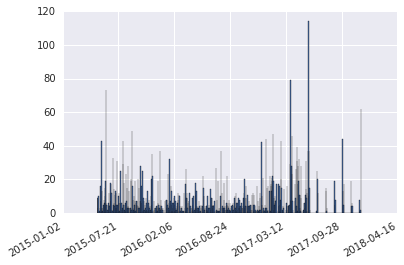

In [166]:
plt.hist(num_dates,bins=700)

# The format for the x axis is set to the chosen string, as defined from a numerical date:
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda num_dates, _: num2date(num_dates).strftime('%Y-%m-%d')))
# The formatting proper is done:
plt.gcf().autofmt_xdate()
# To show the result:
plt.show()  # or draw(), if you don't want to block

In [205]:
SfBartAlert.head(20)

,id,username,created_at,text,date
0,8.724150e+17,SFBARTalert,7/6/17 11:28,b'BART recovering: 10 min delay at DALY in PIT...,2017-06-07 11:28:00
1,8.724120e+17,SFBARTalert,7/6/17 11:18,b'10 min delay at DALY in PITT and DUBL dirs d...,2017-06-07 11:18:00
2,8.721180e+17,SFBARTalert,6/6/17 15:50,b'10 min delay at PHIL in SFO and DALY dirs du...,2017-06-06 15:50:00
3,8.721040e+17,SFBARTalert,6/6/17 14:53,b'BART recovering: 10 min delay at 12TH in SFO...,2017-06-06 14:53:00
4,8.721020e+17,SFBARTalert,6/6/17 14:44,"b'10 min delay at 12TH in SFO, MLBR and DALY d...",2017-06-06 14:44:00
5,8.718830e+17,SFBARTalert,6/6/17 0:13,"b'BART recovering: 10 min delay in PITT, DUBL,...",2017-06-06 00:13:00
6,8.718760e+17,SFBARTalert,5/6/17 23:47,b'BART recovering: 20 min delay on SF line in ...,2017-06-05 23:47:00
7,8.718750e+17,SFBARTalert,5/6/17 23:43,b'20 min delay on SF line in East Bay dir due ...,2017-06-05 23:43:00
8,8.718720e+17,SFBARTalert,5/6/17 23:32,b'BART recovering: 10 min delay on SF line in ...,2017-06-05 23:32:00
9,8.718640e+17,SFBARTalert,5/6/17 22:58,"b'10 min delay on SF line in SFO, MLBR, DALY a...",2017-06-05 22:58:00


In [202]:
#Tweets = AllTweets['username'=="b'SFBARTalert '"]
Tweets = AllTweets.loc[:,AllTweets.loc['username'] == "b'SFBARTalert '"]

KeyError: 'the label [username] is not in the [index]'

In [29]:
Tweets

,index,username,tweet,timestamp
0,0,b'SFBARTalert ',b'Major delay system wide due to an earlier di...,30/5/17 7:22
1,1,b'jkurnia ',b'Implement one cop per car at rush hours',6/6/17 8:02
2,2,b'SFBARTalert ',b'BART recovering: 10 min delay at 12TH in SFO...,6/6/17 7:53
3,3,b'~e ',b'.@SFBARTalert On a Warm Springs train at DC ...,6/6/17 7:33
4,4,b'ruby_arizona ',"b""What's wrong w/this picture? @SFBARTalert @S...",5/6/17 18:03
5,5,b'SFBARTalert ',"b'BART recovering: 10 min delay in PITT, DUBL,...",5/6/17 17:13
6,6,b'SFBARTalert ',b'20 min delay on SF line in East Bay dir due ...,5/6/17 16:43
7,7,b'SFBARTalert ',"b'10 min delay at EMBR in SFO, MLBR, DALY and ...",5/6/17 8:10
8,8,b'Robin Winston\nVerified account\n ',"b'The 3 left lanes are now blocked, backed up ...",5/6/17 7:22
9,9,b'SFBARTalert ',b'Major delay at 16TH on SF line in PITT and D...,3/6/17 15:33


In [13]:
Tweets = AllTweets[2=="b'SFBARTalert'"]

KeyError: False

In [10]:
AllTweets.head()

,index,username,tweet,timestamp
0,0,b'SFBARTalert ',b'Major delay system wide due to an earlier di...,30/5/17 7:22
1,1,b'jkurnia ',b'Implement one cop per car at rush hours',6/6/17 8:02
2,2,b'SFBARTalert ',b'BART recovering: 10 min delay at 12TH in SFO...,6/6/17 7:53
3,3,b'~e ',b'.@SFBARTalert On a Warm Springs train at DC ...,6/6/17 7:33
4,4,b'ruby_arizona ',"b""What's wrong w/this picture? @SFBARTalert @S...",5/6/17 18:03
